In [15]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_parquet('data/yellow_tripdata_2023-01.parquet')

In [4]:
df.shape

(3066766, 19)

In [6]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [7]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime


In [11]:
df.duration = df.duration.apply(lambda x: x.total_seconds() / 60)

In [12]:
df[['tpep_pickup_datetime', 'duration']].head()

,tpep_pickup_datetime,duration
0,2023-01-01 00:32:10,8.433333
1,2023-01-01 00:55:08,6.316667
2,2023-01-01 00:25:04,12.750000
3,2023-01-01 00:03:48,9.616667
4,2023-01-01 00:10:29,10.833333


In [13]:
df.duration.std()

np.float64(42.59435124195458)

/tmp/ipykernel_2825/3426635498.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)


<Axes: xlabel='duration', ylabel='Density'>

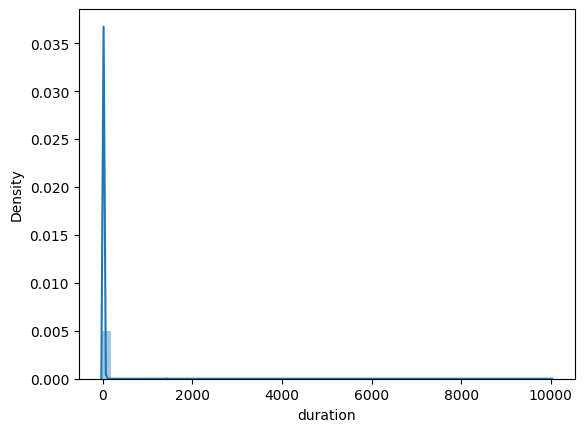

In [16]:
sns.distplot(df.duration)

In [20]:
df.duration.describe(percentiles=[.95, .98, .99])

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
50%      1.151667e+01
95%      3.646667e+01
98%      4.873333e+01
99%      5.725000e+01
max      1.002918e+04
Name: duration, dtype: float64

In [21]:
len(df)

3066766

In [22]:
df = df[((df.duration >= 1) & (df.duration <= 60))]

In [23]:
len(df)

3009173

In [24]:
3009173 / 3066766

0.9812202822125979